## Simple Linear Regression - Review and Applications
##### Author: Renato da Silva 
##### Date: 02/2026 


##### Objectives
- Use scikit-learn to implement simple linear regression
- Create, train, and test a linear regression model on real data

In [1]:
# Import 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the data
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# Understanding the data - EDA
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


We can see that most cars (~75%) have a fuel efficiendy between 11 and 31 MPG. However, one of the cars has a value of 60 MPG, which is much higher than the rest. This could be a valid measurement for a highly efficient vehicle, or might be an outlier or even an entry error. 

Also, MODELYEAR has 0.0 standard deviation, and thus has no useful information for us. 

In [4]:
# Select features
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


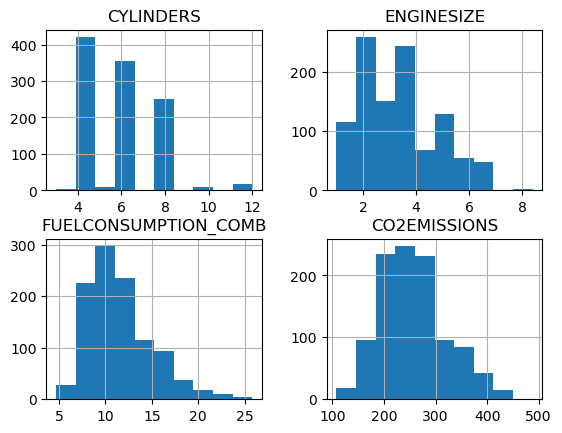

In [6]:
# Visualize the data
viz = cdf[["CYLINDERS", "ENGINESIZE", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
viz.hist()
plt.show()

- most engines have 4, 6, or 8 cylinders
- engine sizer between 2 and 4 liters
- combined fuels consumption and CO2 emission have very similar distributions
- *Next step*: check how linear these relations are by using scatter plots

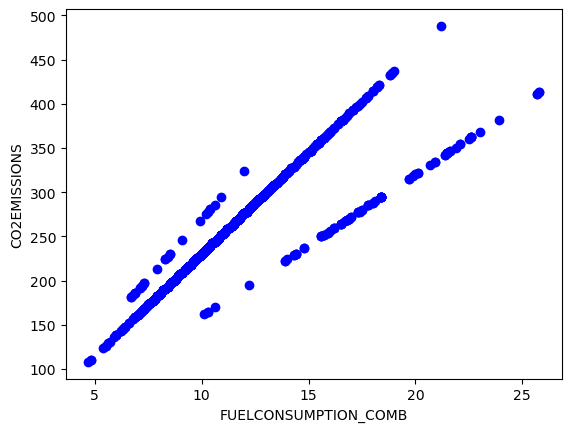

In [ ]:
# Scatter plot FUELCONSUMPTION_COMB x CO2EMISSIONS
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

- 3 car groups have strong linear relationship between combined fuel consumption and their CO2 emissions.
- Their intercepts are similar, however their slopes differ. 

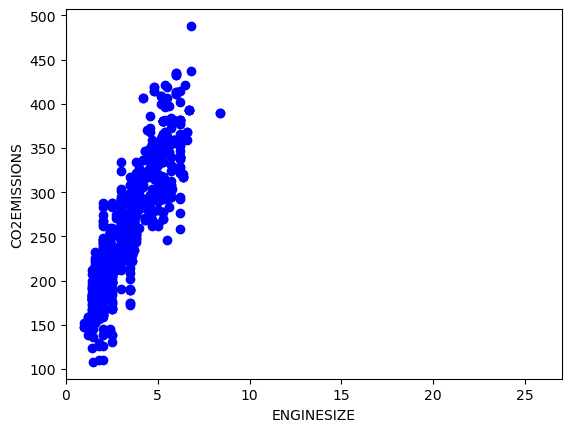

In [9]:
# Scatter plot ENGINESIZE x CO2EMISSIONS
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="blue")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.xlim(0, 27)
plt.show()

- Although quite linear, their correlation is weaker than that for each of the 3 fuel consumption groups.
- Notice that the x-axis has been expanded to make the two plots more comparable.

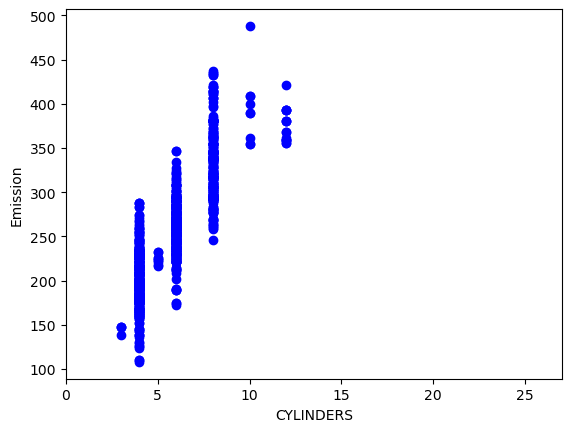

In [11]:
# Scatter plot CYLINDERS x CO2EMISSIONS
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")
plt.xlim(0,27)
plt.show()

In [ ]:
# Let's do our regression with ENGINESIZE and CO2EMISSIONS
# Extract input feature and labels from cdf
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [13]:
# import train_test_split
from sklearn.model_selection import train_test_split

# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(f"Type: {type(X_train)}, Shape: {X_train.shape}, First 5 elements: {X_train[:5]}")

Type: <class 'numpy.ndarray'>, Shape: (853,), First 5 elements: [1.4 4.4 3.  3.  5.3]


In [19]:
# Build simple linear regression model
from sklearn import linear_model

# create a model object
regr = linear_model.LinearRegression()

# train the model on the training data
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# So we need to reshape it. We can let it infer the number of observations using '-1'.
X_train_reshaped = X_train.reshape(-1, 1)
regr.fit(X_train_reshaped, y_train)

# print the coefficients
print("Coefficients: ", regr.coef_[0])
print("Intercept: ", regr.intercept_)

Coefficients:  38.992978724434046
Intercept:  126.2897021740873


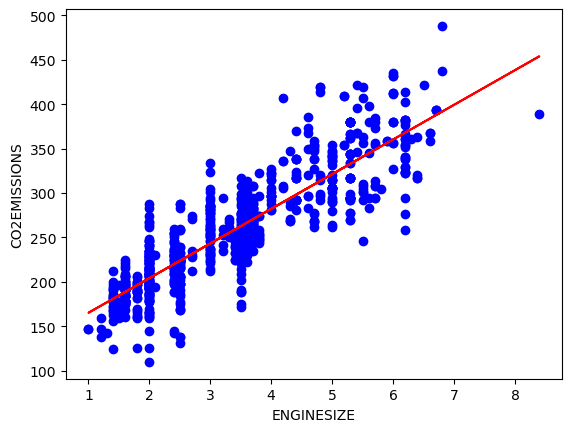

In [33]:
# visualize model outputs
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, regr.coef_[0] * X_train + regr.intercept_, color="red")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()  

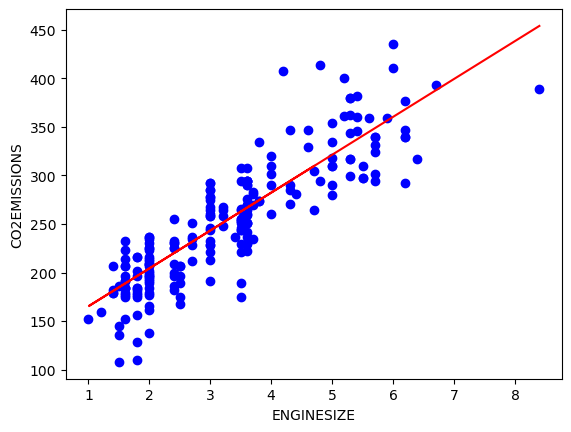

In [35]:
# regression model result over the test data
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test, regr.coef_[0] * X_test + regr.intercept_, color="red")
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()  

#### Model evaluation
You can compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics play a key role in the development of a model, as they provide insight into areas that require improvement.

There are different model evaluation metrics, let's use MSE here to calculate the accuracy of our model based on the test set: 
* Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just an average error.

* Mean Squared Error (MSE): MSE is the mean of the squared error. In fact, it's the metric used by the model to find the best fit line, and for that reason, it is also called the residual sum of squares.

* Root Mean Squared Error (RMSE). RMSE simply transforms the MSE into the same units as the variables being compared, which can make it easier to interpret.

* R2-Score is not an error but rather a popular metric used to estimate the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R2-Score value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [25]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Use the predict method to make tst predictions
y_pred = regr.predict(X_test.reshape(-1, 1))

# Evaluation
print("R2 Score: %.2f" % r2_score(y_test, y_pred))
print("Mean Squared Error: %.2f" % mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))



R2 Score: 0.76
Mean Squared Error: 985.94
Mean Absolute Error: 24.10
Root mean squared error: 31.40


In [36]:
# Now, let's do the regression with fuel consumption and CO2 emissions

# Extract input feature and labels from cdf
X1 = cdf.FUELCONSUMPTION_COMB.to_numpy()
y1 = cdf.CO2EMISSIONS.to_numpy()

# create train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [37]:
# create a model object
regr1 = linear_model.LinearRegression()

# train the model on the training data
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# So we need to reshape it. We can let it infer the number of observations using '-1'.
X1_train_reshaped = X1_train.reshape(-1, 1)
regr1.fit(X1_train_reshaped, y1_train)
regr.fit(X_train_reshaped, y_train)

# print the coefficients
print("Coefficients: ", regr1.coef_[0])
print("Intercept: ", regr1.intercept_)

Coefficients:  16.18090078119918
Intercept:  69.10302617988461


In [38]:
# Use the predict method to make tst predictions
y_pred1 = regr1.predict(X1_test.reshape(-1, 1))

# Evaluation
print("R2 Score: %.2f" % r2_score(y1_test, y_pred1))
print("Mean Squared Error: %.2f" % mean_squared_error(y1_test, y_pred1))
print("Mean Absolute Error: %.2f" % mean_absolute_error(y1_test, y_pred1))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y1_test, y_pred1)))

R2 Score: 0.81
Mean Squared Error: 797.43
Mean Absolute Error: 20.44
Root mean squared error: 28.24


- FUELDCONSUMPTION_COMB has better linear correlation with CO2 emission compared to ENGINESIZE
- Let's plot this

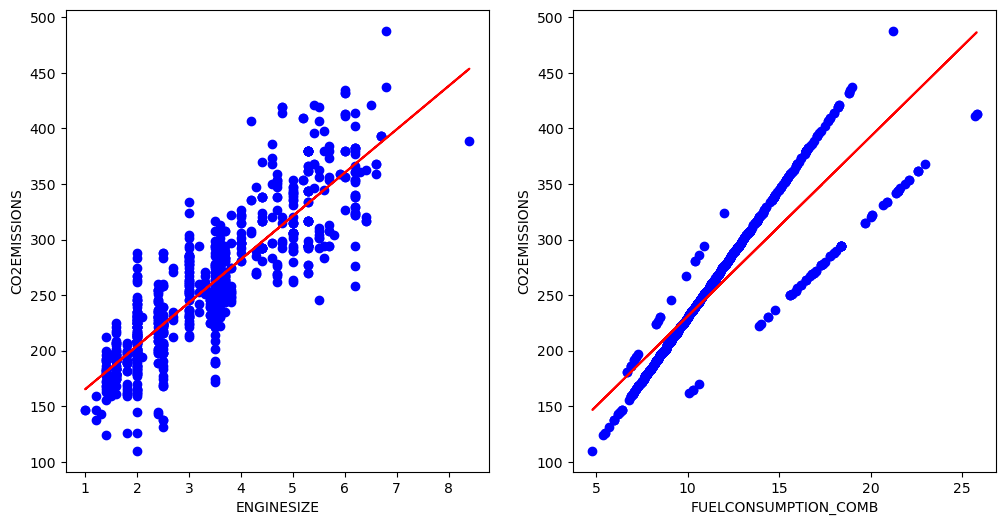

In [ ]:
# visualize model outputs
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(X_train, y_train, color="blue")
ax[0].plot(X_train, regr.coef_[0] * X_train + regr.intercept_, color="red")
ax[0].set_xlabel("ENGINESIZE")
ax[0].set_ylabel("CO2EMISSIONS")    

ax[1].scatter(X1_train, y1_train, color="blue")
ax[1].plot(X1_train, regr1.coef_[0] * X1_train + regr1.intercept_, color="red")
ax[1].set_xlabel("FUELCONSUMPTION_COMB")
ax[1].set_ylabel("CO2EMISSIONS")
plt.show()